- https://www.ncei.noaa.gov/data/global-summary-of-the-day/doc/readme.pdf
- https://python-graph-gallery.com/315-a-world-map-of-surf-tweets

In [1]:
import pandas as pd
import numpy as np
import glob

# Basemap library
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('../Data/2021_summary/01001099999.csv')

In [3]:
def getSumPipeline(df):
    # Make FRSHTT 6 digits
    def fillFRSHTT(int):
        return str(int).zfill(6)

    # Get Weather type
    def getFog(str):
        return int(str[0])
    def getRain(str):
        return int(str[1])
    def getSnow(str):
        return int(str[2])
    def getHail(str):
        return int(str[3])
    def getThunder(str):
        return int(str[4])
    def getTornado(str):
        return int(str[5])
    
    df['FRSHTT'] = df['FRSHTT'].apply(fillFRSHTT)

    df['has_Fog'] = df['FRSHTT'].apply(getFog)
    df['has_Rain'] = df['FRSHTT'].apply(getRain)
    df['has_Snow'] = df['FRSHTT'].apply(getSnow)
    df['has_Hail'] = df['FRSHTT'].apply(getHail)
    df['has_Thunder'] = df['FRSHTT'].apply(getThunder)
    df['has_Tornado'] = df['FRSHTT'].apply(getTornado)

    df_sum = df.groupby('STATION').sum().reset_index()[['STATION','has_Rain','has_Snow','has_Hail','has_Thunder','has_Tornado']]
    
    return df_sum

In [4]:
getSumPipeline(df)

,STATION,has_Rain,has_Snow,has_Hail,has_Thunder,has_Tornado
0,1001099999,160,133,2,0,0


In [5]:
data_root_path = '../Data/'
summary_2021_path = data_root_path + '2021_summary/'


inputpathcollection = summary_2021_path + '*.csv'
# inputpath = '../Data/'+year+'/'
# outputpath = '../DataProcessed/'+year+'/'

df_all = pd.DataFrame()

for file in glob.glob(inputpathcollection):
    #print(file)
    # fname = file[13:]
    # #print(fname_nopath)
    # print(fname)
    df_raw = pd.read_csv(file)
    df = getSumPipeline(df_raw)
    df_all = pd.concat([df_all,df])

In [46]:
#df_all.to_csv('../DataProcessed/2021_summary_weather.csv')

In [ ]:
df_all['STATION'] = df_all['STATION'].astype(str)
df_all

In [141]:
df_all

,STATION,has_Rain,has_Snow,has_Hail,has_Thunder,has_Tornado
0,57328099999,186,0,0,0,0
0,71393099999,0,0,0,0,0
0,72210103039,88,117,0,70,0
0,71670099999,0,0,0,0,0
0,40632099999,11,0,0,3,0
...,...,...,...,...,...,...
0,40675099999,12,0,0,3,0
0,59658099999,133,0,1,0,0
0,71637099999,0,0,0,0,0
0,64328099999,0,0,0,1,0


In [86]:
StationReference = pd.read_csv('../Data/StationReference.csv')
StationReference['STATION'] = StationReference['filename']
StationReference

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,filename,latlon,name,admin1,admin2,cc
0,57328099999,31.200000,107.500000,344.0,"DA XIAN, CH",57328099999,"(31.2, 107.5)",Nanwai,Sichuan,NaN,CN
1,71393099999,51.100000,-114.000000,1081.0,"CALGARY INTERNATIONAL CS, CA",71393099999,"(51.1, -114.0)",Calgary,Alberta,NaN,CA
2,72210103039,37.450000,-106.800000,3593.9,"WOLF CREEK PASS, CO US",72210103039,"(37.45, -106.8)",Pagosa Springs,Colorado,Archuleta County,US
3,71670099999,46.770000,-65.000000,34.0,"KOUCHIBOUGUAC CS, CA",71670099999,"(46.77, -65.0)",Richibucto,New Brunswick,NaN,CA
4,40632099999,34.883333,44.650000,220.0,"TUZ, IZ",40632099999,"(34.8833333, 44.65)",Tozkhurmato,Salah ad Din Governorate,NaN,IQ
...,...,...,...,...,...,...,...,...,...,...,...
12976,40675099999,31.717000,46.100000,6.0,"RAFAEI, IZ",40675099999,"(31.717, 46.1)",Ar Rifa`i,Dhi Qar,NaN,IQ
12977,42393099999,26.133333,86.583333,50.0,"SUPAUL, IN",42393099999,"(26.1333333, 86.5833333)",Supaul,Bihar,Supaul,IN
12978,59658099999,21.216667,110.400000,28.0,"ZHANJIANG, CH",59658099999,"(21.2166667, 110.4)",Haitou,Guangdong,NaN,CN
12979,71637099999,53.416667,-111.733333,687.0,"RANFURLY AUTO, CA",71637099999,"(53.4166666, -111.7333333)",Two Hills,Alberta,NaN,CA


In [153]:
df_all_latlon = pd.merge(df_all, StationReference, on='STATION')[['STATION','has_Rain','has_Snow','has_Hail','has_Thunder','has_Tornado','LATITUDE','LONGITUDE','NAME']]

In [217]:
bins = [0,50,100,150,200,250,300]
labels=[0,1,2,3,4,5]
labels_ticks=[0,50,100,150,200,250]

df_all_latlon['has_Rain_encode'] = pd.cut(df_all_latlon['has_Rain'], bins=bins, labels=labels, include_lowest=True)

In [214]:
data = df_all_latlon
data

,STATION,has_Rain,has_Snow,has_Hail,has_Thunder,has_Tornado,LATITUDE,LONGITUDE,NAME,has_Rain_encode
0,57328099999,186,0,0,0,0,31.200000,107.500000,"DA XIAN, CH",3
1,71393099999,0,0,0,0,0,51.100000,-114.000000,"CALGARY INTERNATIONAL CS, CA",0
2,72210103039,88,117,0,70,0,37.450000,-106.800000,"WOLF CREEK PASS, CO US",1
3,71670099999,0,0,0,0,0,46.770000,-65.000000,"KOUCHIBOUGUAC CS, CA",0
4,40632099999,11,0,0,3,0,34.883333,44.650000,"TUZ, IZ",0
...,...,...,...,...,...,...,...,...,...,...
10425,26318099999,8,0,0,0,0,57.183333,22.550000,"STENDE, LG",0
10426,40675099999,12,0,0,3,0,31.717000,46.100000,"RAFAEI, IZ",0
10427,59658099999,133,0,1,0,0,21.216667,110.400000,"ZHANJIANG, CH",2
10428,71637099999,0,0,0,0,0,53.416667,-111.733333,"RANFURLY AUTO, CA",0


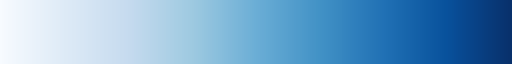

In [308]:
plt.cm.Blues

In [244]:
cmap=plt.cm.Blues
norm = plt.Normalize(vmin=0, vmax=365) 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  

In [237]:
c=data['has_Rain']
norm = plt.Normalize(vmin=c.min(), vmax=c.max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)

In [254]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = plt.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Blues')
cmap_trunc = cmap(np.linspace(0.2, 0.8, 100))

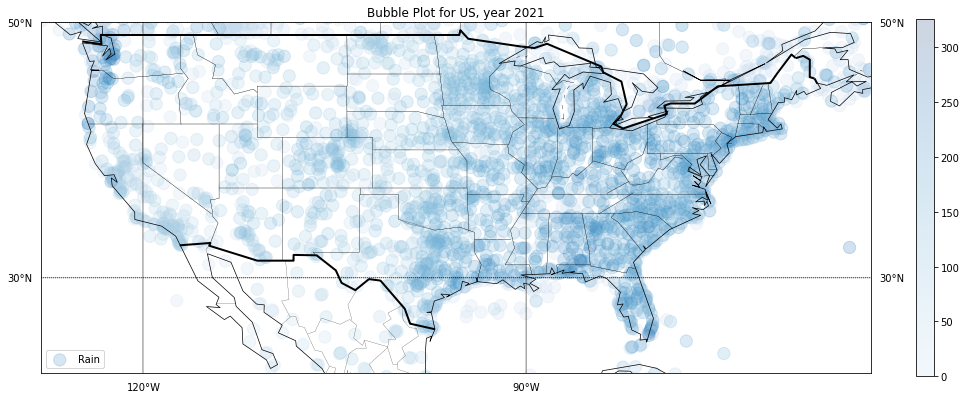

In [274]:
import cmasher as cmr

cmap_blues = cmr.get_sub_cmap('Blues', 0.25, 1)

# Make the background map

# Plot basemap
fig = plt.figure(figsize=(16,12))

# m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
# m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
# m.fillcontinents(color='grey', alpha=0.3)
# m.drawcoastlines(linewidth=0.1, color="white")

m = Basemap(llcrnrlon = -128, llcrnrlat = 22.5, urcrnrlon = -63, urcrnrlat = 50)
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=2)
m.drawstates(linewidth=0.2)
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


c=data['has_Rain']
norm = plt.Normalize(vmin=c.min(), vmax=c.max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)

sm = m.scatter(
    y=data['LATITUDE'], 
    x=data['LONGITUDE'], 
    #s=data['has_Rain']*5, 
    s = 150,
    alpha=0.2, 
    c=data['has_Rain'], 
    cmap=cmap_blues,
    label='Rain'
)


cb = fig.colorbar(sm, orientation='vertical',fraction=0.02, pad=0.05)
#cb = fig.colorbar(cmap, orientation='vertical',fraction=0.02, pad=0.05)

plt.title('Bubble Plot for US, year 2021')
plt.legend()
plt.savefig('../visual/bubble_rain_2021.jpg')
plt.show()

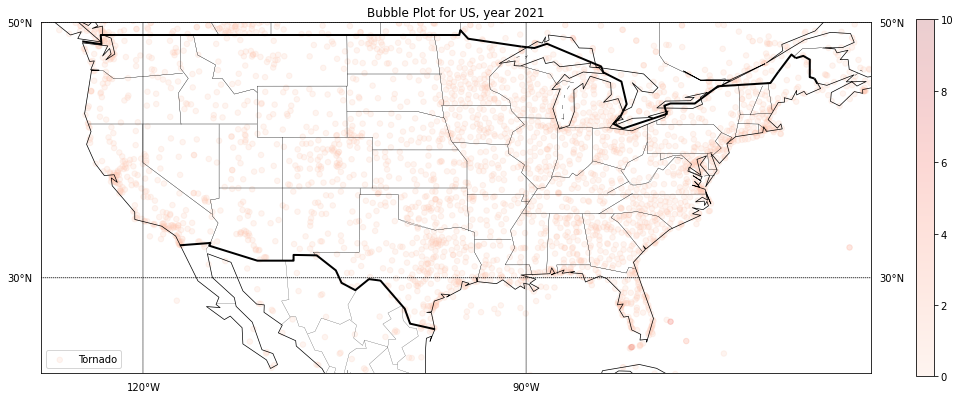

In [298]:
import cmasher as cmr

cmap_ = cmr.get_sub_cmap('Reds', 0.2, 0.9)

# Make the background map

# Plot basemap
fig = plt.figure(figsize=(16,12))

# m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
# m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
# m.fillcontinents(color='grey', alpha=0.3)
# m.drawcoastlines(linewidth=0.1, color="white")

m = Basemap(llcrnrlon = -128, llcrnrlat = 22.5, urcrnrlon = -63, urcrnrlat = 50)
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=2)
m.drawstates(linewidth=0.2)
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


c=data['has_Rain']
norm = plt.Normalize(vmin=c.min(), vmax=c.max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)

sm = m.scatter(
    y=data['LATITUDE'], 
    x=data['LONGITUDE'], 
    #s=data['has_Rain']*5, 
    s = 30,
    alpha=0.2, 
    c=data['has_Tornado'], 
    cmap=cmap_,
    label='Tornado'
)


cb = fig.colorbar(sm, orientation='vertical',fraction=0.02, pad=0.05)
#cb = fig.colorbar(cmap, orientation='vertical',fraction=0.02, pad=0.05)

plt.title('Bubble Plot for US, year 2021')
plt.legend()
plt.savefig('../visual/bubble_tornado_2021.jpg')
plt.show()

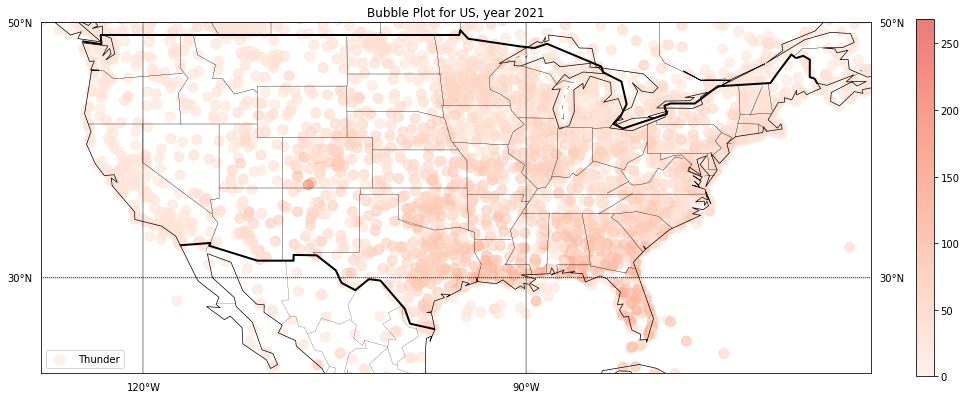

In [303]:
import cmasher as cmr

cmap_ = cmr.get_sub_cmap('Reds', 0.1,0.7)

# Make the background map

# Plot basemap
fig = plt.figure(figsize=(16,12))

# m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
# m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
# m.fillcontinents(color='grey', alpha=0.3)
# m.drawcoastlines(linewidth=0.1, color="white")

m = Basemap(llcrnrlon = -128, llcrnrlat = 22.5, urcrnrlon = -63, urcrnrlat = 50)
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=2)
m.drawstates(linewidth=0.2)
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


c=data['has_Rain']
norm = plt.Normalize(vmin=c.min(), vmax=c.max())
cmap = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.Blues)

sm = m.scatter(
    y=data['LATITUDE'], 
    x=data['LONGITUDE'], 
    #s=data['has_Rain']*5, 
    s = 100,
    alpha=0.6, 
    c=data['has_Thunder'], 
    cmap=cmap_,
    label='Thunder'
)


cb = fig.colorbar(sm, orientation='vertical',fraction=0.02, pad=0.05)
#cb = fig.colorbar(cmap, orientation='vertical',fraction=0.02, pad=0.05)

plt.title('Bubble Plot for US, year 2021')
plt.legend()
plt.savefig('../visual/bubble_thunder_2021.jpg')
plt.show()

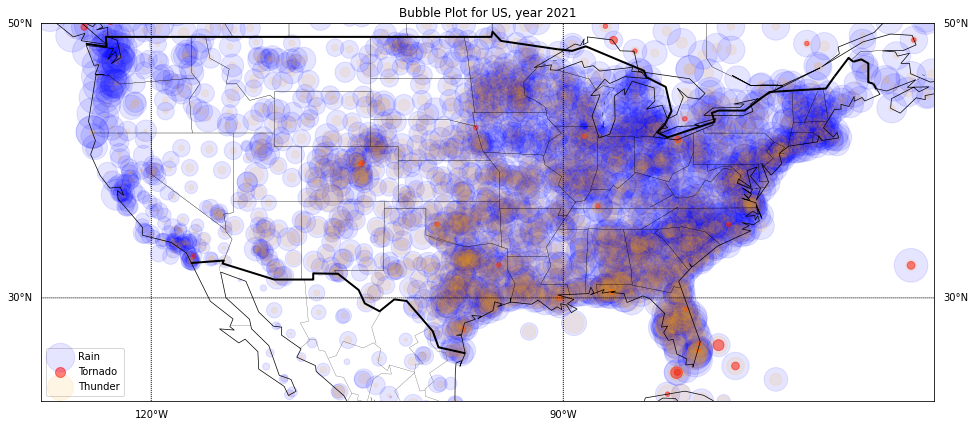

In [302]:
# Make the background map

# Plot basemap
fig = plt.figure(figsize=(16,12))

# m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
# m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
# m.fillcontinents(color='grey', alpha=0.3)
# m.drawcoastlines(linewidth=0.1, color="white")

m = Basemap(llcrnrlon = -128, llcrnrlat = 22.5, urcrnrlon = -63, urcrnrlat = 50)
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=2)
m.drawstates(linewidth=0.2)
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

m.scatter(
    y=data['LATITUDE'], 
    x=data['LONGITUDE'], 
    s=data['has_Rain']*5, 
    alpha=0.1, 
    #c=data['labels_enc'], 
    color='blue',
    #cmap="Set1",
    label='Rain'
)

m.scatter(
    y=data['LATITUDE'], 
    x=data['LONGITUDE'], 
    s=data['has_Tornado']*20, 
    alpha=0.5, 
    #c=data['labels_enc'], 
    cmap="Set1",
    color = 'red',
    label='Tornado'
)

m.scatter(
    y=data['LATITUDE'], 
    x=data['LONGITUDE'], 
    s=data['has_Thunder']*5, 
    alpha=0.1, 
    #c=data['labels_enc'], 
    color = 'orange',
    cmap="Set1",
    label='Thunder'
)

plt.title('Bubble Plot for US, year 2021')
plt.legend()
plt.savefig('../visual/bubble_combine_2021.jpg')
plt.show()